# DeepLearning

## MNIST Dataset
The MNIST database is a well-known academic dataset used to benchmark
classification performance. The data consists of 60,000 training images and
10,000 test images. Each image is a standardized $28^2$ pixel greyscale image of
a single handwritten digit. An example of the scanned handwritten digits is
shown
![Example MNIST digit images](images/mnist.png)

In [1]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,13 mins 53 secs
H2O cluster version:,3.11.0.99999
H2O cluster version age:,1 hour and 15 minutes
H2O cluster name:,arno
H2O cluster total nodes:,1
H2O cluster free memory:,13.70 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [2]:
test_df = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/test.csv.gz")

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%


In [3]:
train_df = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/train.csv.gz")

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%


In [4]:
from h2o.estimators.deepwater import H2ODeepWaterEstimator

Specify the response and predictor columns

In [5]:
y = "C785"
x = train_df.names[0:784]

In [6]:
train_df[y] = train_df[y].asfactor()
test_df[y] = test_df[y].asfactor()

Train Deep Learning model and validate on test set

In [7]:
from h2o.estimators.deepwater import H2ODeepWaterEstimator

model = H2ODeepWaterEstimator(
   distribution="multinomial",
   activation="rectifier",
   hidden=[1024,1024,1024],
   #hiden_dropout_ratios=[0.5,0.5,0.5],  ## for better generalization
   input_dropout_ratio=0.1,
   #sparse=True,                         ## can speed up
   epochs=10)

In [8]:
model.train(
    x=x, 
    y=y,
    training_frame=train_df,
    validation_frame=test_df
)

deepwater Model Build progress: |█████████████████████████████████████████████████████████████| 100%


In [9]:
model.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2016-10-22 14:05:27,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2016-10-22 14:05:27,2.943 sec,4000 obs/sec,0.017067,1,1024.0,0.466294,7.509779,0.217430,0.461303,7.349852,0.2128
2,,2016-10-22 14:05:47,21.886 sec,15467 obs/sec,4.744533,278,284672.0,0.201571,1.403343,0.040631,0.233452,1.882363,0.0545
3,,2016-10-22 14:05:55,29.946 sec,15931 obs/sec,6.792533,398,407552.0,0.172769,1.030232,0.029849,0.214784,1.592321,0.0462
4,,2016-10-22 14:06:04,38.828 sec,16268 obs/sec,9.096533,533,545792.0,0.143408,0.710301,0.020565,0.205898,1.458663,0.0424
5,,2016-10-22 14:06:08,43.276 sec,16196 obs/sec,10.001067,586,600064.0,0.153167,0.807716,0.023460,0.221811,1.699308,0.0492
6,,2016-10-22 14:06:09,44.132 sec,16181 obs/sec,10.001067,586,600064.0,0.143408,0.710301,0.020565,0.205898,1.458663,0.0424


In [10]:
model.model_performance(train=True) # training metrics


ModelMetricsMultinomial: deepwater
** Reported on train data. **

MSE: 0.0205658497306
RMSE: 0.143407983497
LogLoss: 0.710300723795
Mean Per-Class Error: 0.0206263535198
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
989.0,0.0,5.0,0.0,3.0,2.0,0.0,4.0,2.0,2.0,0.0178749,"18 / 1,007"
1.0,1110.0,2.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0089286,"10 / 1,120"
4.0,0.0,966.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0122699,12 / 978
0.0,0.0,7.0,988.0,2.0,6.0,0.0,5.0,6.0,2.0,0.0275591,"28 / 1,016"
1.0,1.0,1.0,0.0,924.0,0.0,0.0,2.0,1.0,4.0,0.0107066,10 / 934
1.0,0.0,0.0,4.0,0.0,902.0,3.0,4.0,4.0,2.0,0.0195652,18 / 920
5.0,1.0,6.0,0.0,3.0,3.0,962.0,0.0,2.0,0.0,0.0203666,20 / 982
0.0,1.0,5.0,2.0,1.0,0.0,0.0,1034.0,0.0,4.0,0.0124164,"13 / 1,047"
5.0,0.0,3.0,8.0,0.0,9.0,1.0,1.0,982.0,1.0,0.0277228,"28 / 1,010"
1.0,0.0,0.0,3.0,17.0,1.0,0.0,23.0,4.0,954.0,0.0488534,"49 / 1,003"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9794350
2,0.9811321
3,0.9811321
4,0.9811321
5,0.9811321
6,0.9811321
7,0.9811321
8,0.9811321
9,0.9811321
10,1.0


In [11]:
model.model_performance(valid=True) # validation metrics


ModelMetricsMultinomial: deepwater
** Reported on validation data. **

MSE: 0.0423941150908
RMSE: 0.205898312501
LogLoss: 1.45866322191
Mean Per-Class Error: 0.0428466948895
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
953.0,0.0,0.0,3.0,5.0,1.0,6.0,11.0,0.0,1.0,0.0275510,27 / 980
0.0,1123.0,4.0,1.0,0.0,3.0,1.0,1.0,2.0,0.0,0.0105727,"12 / 1,135"
4.0,1.0,998.0,5.0,7.0,0.0,2.0,7.0,7.0,1.0,0.0329457,"34 / 1,032"
0.0,1.0,12.0,959.0,0.0,11.0,0.0,13.0,13.0,1.0,0.0504950,"51 / 1,010"
4.0,1.0,7.0,0.0,941.0,1.0,4.0,5.0,2.0,17.0,0.0417515,41 / 982
1.0,0.0,3.0,14.0,1.0,851.0,6.0,7.0,7.0,2.0,0.0459641,41 / 892
4.0,2.0,6.0,0.0,8.0,7.0,927.0,0.0,3.0,1.0,0.0323591,31 / 958
1.0,5.0,15.0,1.0,3.0,0.0,0.0,993.0,5.0,5.0,0.0340467,"35 / 1,028"
4.0,2.0,4.0,11.0,9.0,17.0,3.0,8.0,914.0,2.0,0.0616016,60 / 974
0.0,2.0,3.0,11.0,28.0,4.0,0.0,34.0,10.0,917.0,0.0911794,"92 / 1,009"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9576
2,0.9618
3,0.9618
4,0.9618
5,0.9618
6,0.9618
7,0.9618
8,0.9618
9,0.9618
10,1.0


## Using Crossvalidation

If the value specified for nfolds is a positive integer, N-fold cross-validation is
performed on the training frame and the cross-validation metrics are computed
and stored as model output. 

To disable cross-validation, use `nfolds=0`, which is the default value.

Advanced users can also specify a fold column that defines the holdout
fold associated with each row. By default, the holdout fold assignment is
random. H2O supports other schemes such as round-robin assignment using the modulo
operator.

Perform 5-fold cross-validation on training_frame

In [12]:
model_crossvalidated = H2ODeepWaterEstimator(
   distribution="multinomial",
   activation="rectifier",
   hidden=[1024,1024,1024],
   #hidden_dropout_ratios=[0.5,0.5,0.5].  ## for better generalization
   input_dropout_ratio=0.1,
   #sparse=True,                          ## can speed up
   epochs=10,
   nfolds=3
)

In [13]:
model_crossvalidated.train(
    x=x,
    y=y,
    training_frame=train_df
)

deepwater Model Build progress: |█████████████████████████████████████████████████████████████| 100%


## Extracting and Handling the Results

We can now extract the parameters of our model, examine the scoring process,
and make predictions on new data.

In [14]:
# View specified parameters of the Deep Learning model
model_crossvalidated.params;

In [15]:
# Examine the trained model
model_crossvalidated

Model Details
H2ODeepWaterEstimator :  Deep Water
Model Key:  DeepWater_model_python_1477169483588_4
Status of Deep Learning Model: MLP: [1024, 1024, 1024], 10.9 MB, predicting C785, 10-class classification, 601,088 training samples, mini-batch size 32



,input_neurons,rate,momentum
,717,0.0031229,0.99




ModelMetricsMultinomial: deepwater
** Reported on train data. **

MSE: 0.634263995822
RMSE: 0.796406928537
LogLoss: 1.82055506483
Mean Per-Class Error: 0.69103131075
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
268.0,0.0,743.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7349159,"743 / 1,011"
1.0,584.0,484.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4542056,"486 / 1,070"
1.0,0.0,946.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0010560,1 / 947
0.0,1.0,865.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8359073,"866 / 1,036"
0.0,0.0,773.0,0.0,243.0,0.0,0.0,0.0,0.0,0.0,0.7608268,"773 / 1,016"
0.0,0.0,671.0,0.0,0.0,216.0,1.0,0.0,0.0,0.0,0.7567568,672 / 888
0.0,0.0,781.0,0.0,0.0,1.0,207.0,0.0,0.0,0.0,0.7906977,782 / 989
0.0,0.0,882.0,0.0,0.0,0.0,0.0,149.0,0.0,0.0,0.8554801,"882 / 1,031"
0.0,0.0,789.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,0.7921687,789 / 996
0.0,0.0,971.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.9282983,"971 / 1,046"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.3055832
2,0.3938185
3,0.4801595
4,0.5769691
5,0.6548355
6,0.7334995
7,0.8075773
8,0.8744766
9,0.9515454
10,1.0



ModelMetricsMultinomial: deepwater
** Reported on cross-validation data. **

MSE: 0.0491166666667
RMSE: 0.221622802678
LogLoss: 1.69642956726
Mean Per-Class Error: 0.0496408453366
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
5804.0,2.0,19.0,4.0,7.0,10.0,48.0,6.0,15.0,8.0,0.0200912,"119 / 5,923"
0.0,6582.0,46.0,24.0,12.0,7.0,9.0,16.0,34.0,12.0,0.0237318,"160 / 6,742"
51.0,13.0,5623.0,60.0,22.0,6.0,74.0,50.0,48.0,11.0,0.0562269,"335 / 5,958"
24.0,10.0,76.0,5738.0,3.0,137.0,11.0,31.0,82.0,19.0,0.0641005,"393 / 6,131"
9.0,10.0,23.0,3.0,5576.0,4.0,54.0,22.0,33.0,108.0,0.0455324,"266 / 5,842"
55.0,7.0,12.0,115.0,15.0,5032.0,68.0,9.0,77.0,31.0,0.0717580,"389 / 5,421"
36.0,10.0,16.0,1.0,15.0,25.0,5798.0,0.0,17.0,0.0,0.0202771,"120 / 5,918"
17.0,13.0,40.0,50.0,37.0,13.0,2.0,5991.0,20.0,82.0,0.0437350,"274 / 6,265"
41.0,32.0,57.0,95.0,13.0,77.0,39.0,21.0,5431.0,45.0,0.0717826,"420 / 5,851"
24.0,11.0,7.0,43.0,134.0,32.0,4.0,96.0,120.0,5478.0,0.0791730,"471 / 5,949"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9508833
2,0.95555
3,0.95555
4,0.95555
5,0.95555
6,0.95555
7,0.95555
8,0.95555
9,0.95555
10,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
accuracy,0.9508791,0.0006143,0.951584,0.9513983,0.9496551
err,0.0491209,0.0006143,0.0484160,0.0486018,0.0503449
err_count,982.3333,8.875685,972.0,975.0,1000.0
logloss,1.6965752,0.0212184,1.67223,1.6786455,1.73885
max_per_class_error,0.0971907,0.0044872,0.1041162,0.0887850,0.0986708
mean_per_class_accuracy,0.9504780,0.0005867,0.9511799,0.9509413,0.9493127
mean_per_class_error,0.0495220,0.0005867,0.0488201,0.0490587,0.0506873
mse,0.0491209,0.0006143,0.0484160,0.0486018,0.0503449
r2,0.9941153,0.0000685,0.9942274,0.9941276,0.993991
rmse,0.2216237,0.0013818,0.2200364,0.2204581,0.2243766


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error
,2016-10-22 14:07:51,0.000 sec,None,0.0,0,0.0,nan,nan,nan
,2016-10-22 14:07:52,1 min 41.109 sec,8462 obs/sec,0.0170667,1,1024.0,0.4766743,7.8478436,0.2272183
,2016-10-22 14:07:58,1 min 47.674 sec,13516 obs/sec,1.4165333,83,84992.0,0.2896596,2.8912934,0.0839482
,2016-10-22 14:08:03,1 min 52.741 sec,14651 obs/sec,2.6624,156,159744.0,0.2185331,1.6494590,0.0477567
,2016-10-22 14:08:08,1 min 57.794 sec,15398 obs/sec,3.9765333,233,238592.0,0.2205766,1.6804509,0.0486540
,2016-10-22 14:08:14,2 min 2.876 sec,15849 obs/sec,5.3077333,311,318464.0,0.2139222,1.5799959,0.0457627
,2016-10-22 14:08:19,2 min 7.920 sec,16145 obs/sec,6.6389333,389,398336.0,0.2146202,1.5908554,0.0460618
,2016-10-22 14:08:24,2 min 12.978 sec,16161 obs/sec,7.8848,462,473088.0,0.5248475,2.1057897,0.2846461
,2016-10-22 14:08:29,2 min 17.987 sec,16225 obs/sec,9.1477333,536,548864.0,0.7810443,1.8049201,0.6672981
,2016-10-22 14:08:32,2 min 21.509 sec,16291 obs/sec,10.0181333,587,601088.0,0.7964069,1.8205551,0.6944167


The validation error is based on the
parameter `score validation samples`, which configures the same value
on the validation set (by default, this is the entire validation set).

In [16]:
## Validation error of the original model (using a train/valid split)
model.mean_per_class_error(valid=True)

0.04284669488946667

In [17]:
## Training error of the model trained on 100% of the data
model_crossvalidated.mean_per_class_error(train=True)

0.6910313107498208

In [18]:
## Estimated generalization error of the cross-validated model
model_crossvalidated.mean_per_class_error(xval=True)

0.04964084533660609

In [19]:
#ls ../../h2o-docs/src/booklets/v2_2015/source/images/

## Predicting

Once we have a satisfactory model (as determined by the validation or crossvalidation
metrics), use the `h2o.predict()` command to compute and store
predictions on new data for additional refinements in the interactive data science
process.

In [20]:
predictions = model_crossvalidated.predict(test_df)

deepwater prediction progress: |██████████████████████████████████████████████████████████████| 100%


In [21]:
predictions.head()

predict,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
2,0.0951605,0.0562663,0.121961,0.11441,0.0899458,0.092208,0.101479,0.114793,0.0993742,0.114402
3,0,0.00159502,5.02568e-06,0.9984,0,0,0,0,0,0
2,0.0951605,0.0562663,0.121961,0.11441,0.0899458,0.092208,0.101479,0.114793,0.0993742,0.114402
2,0.0951605,0.0562663,0.121961,0.11441,0.0899458,0.092208,0.101479,0.114793,0.0993742,0.114402
2,0.0951605,0.0562663,0.121961,0.11441,0.0899458,0.092208,0.101479,0.114793,0.0993742,0.114402
2,0.0951605,0.0562663,0.121961,0.11441,0.0899458,0.092208,0.101479,0.114793,0.0993742,0.114402
2,0.0951605,0.0562663,0.121961,0.11441,0.0899458,0.092208,0.101479,0.114793,0.0993742,0.114402
2,0.0951605,0.0562663,0.121961,0.11441,0.0899458,0.092208,0.101479,0.114793,0.0993742,0.114402
2,0.0951605,0.0562663,0.121961,0.11441,0.0899458,0.092208,0.101479,0.114793,0.0993742,0.114402
2,0.0951605,0.0562663,0.121961,0.11441,0.0899458,0.092208,0.101479,0.114793,0.0993742,0.114402


## Variable Importance

Variable importance allows us to view the absolute and relative predictive strength of
each feature in the prediction task.
Each H2O algorithm class has its own methodology for computing variable importance.

You can enable the variable importance, by setting the `variable_importances` parameter to `True`.

H2O’s Deep Learning uses the Gedeon method [Gedeon, 1997](http://users.cecs.anu.edu.au/~Tom.Gedeon/pdfs/ContribDataMinv2.pdf), which is disabled
by default since it can be slow for large networks. 

If variable importance is a top priority in your analysis, consider training a Distributed Random Forest (DRF) model and compare the generated variable importances.

In [22]:
# Train Deep Learning model and validate on test set and save the variable importances
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

model_variable_importances = H2ODeepLearningEstimator(
     distribution="multinomial",
     activation="RectifierWithDropout",
     hidden=[32,32,32],         ## smaller number of neurons to be fast enough on the CPU
     input_dropout_ratio=0.2,
     sparse=True,
     epochs=10,
     variable_importances=True) ## this is not yet implemented for DeepWaterEstimator

In [23]:
model_variable_importances.train(
         x=x,
         y=y,
         training_frame=train_df,
         validation_frame=test_df)

deeplearning Model Build progress: |██████████████████████████████████████████████████████████| 100%


In [25]:
# Retrieve the variable importance
import pandas as pd
pd.DataFrame(model_variable_importances.varimp())

,0,1,2,3
0,C379,1.000000,1.000000,0.003012
1,C351,0.981022,0.981022,0.002955
2,C488,0.947116,0.947116,0.002853
3,C491,0.917125,0.917125,0.002763
4,C323,0.887518,0.887518,0.002674
5,C348,0.875348,0.875348,0.002637
6,C486,0.868360,0.868360,0.002616
7,C490,0.861337,0.861337,0.002595
8,C489,0.858364,0.858364,0.002586
9,C378,0.847305,0.847305,0.002552


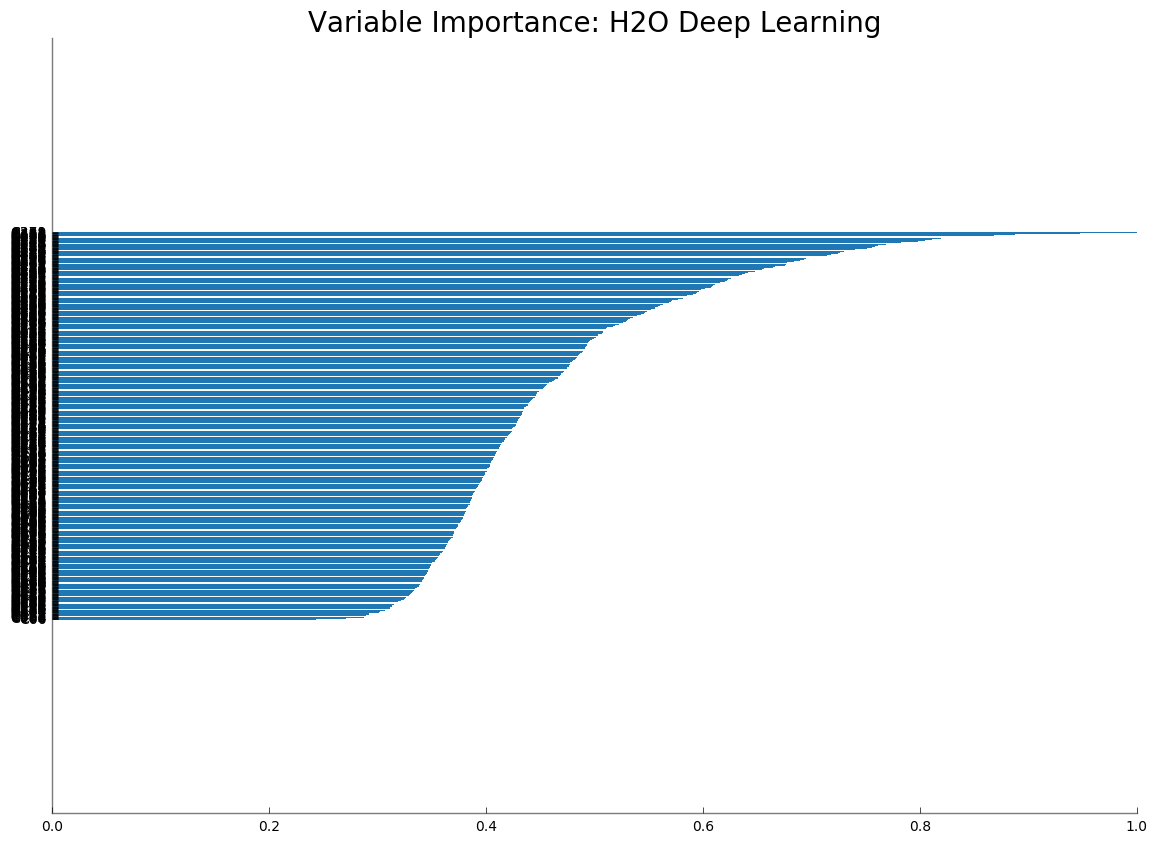

In [26]:
model_variable_importances.varimp_plot()

## Model Comparison with Grid Search

Grid search provides more subtle insights into the model tuning and selection
process by inspecting and comparing our trained models after the grid search process is complete. 

To learn when and how to select different parameter
configurations in a grid search, refer to Parameters for parameter descriptions
and configurable values.

There are different strategies to explore the hyperparameter combinatorial space:

- Cartesian Search: test *every* single combination
- Random Search: sample combinations

## Cartesian Search
In this example, three different network topologies and two different $l_1$ norm
weights are specified. This grid search model trains six different models using all
possible combinations of these parameters; other parameter combinations can
be specified for a larger space of models. Note that the models will most likely
converge before the default value of epochs, since early stopping is enabled.

In [27]:
from h2o.grid.grid_search import H2OGridSearch

In [28]:
hyper_parameters = {
    "hidden":[[200,200,200],[300,300],[500]], 
    "learning_rate":[1e-3,5e-3],
}

model_grid = H2OGridSearch(H2ODeepWaterEstimator, hyper_params=hyper_parameters)

In [29]:
model_grid.train(
    x=x, 
    y=y,
    distribution="multinomial", 
    epochs=1000,
    training_frame=train_df, 
    validation_frame=test_df,
    score_interval=2, 
    stopping_rounds=3,
    stopping_tolerance=0.05,
    stopping_metric="misclassification")

deepwater Grid Build progress: |██████████████████████████████████████████████████████████████| 100%


In [30]:
# print model grid search results
model_grid

              hidden learning_rate  \
0         [300, 300]         0.005   
1              [500]         0.005   
2         [300, 300]         0.001   
3    [200, 200, 200]         0.001   
4              [500]         0.001   
5    [200, 200, 200]         0.005   

                                                           model_ids  \
0  Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_4   
1  Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_5   
2  Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_1   
3  Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_0   
4  Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_2   
5  Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_3   

              logloss  
0  1.1154530555508715  
1  1.3041829310332147  
2  1.8262448334340582  
3  1.8825314106317805  
4  1.9376039117616448  
5   9.994712853586279  


In [34]:
for model in model_grid:
    print model.model_id + " mean per class error: " + str(model.mean_per_class_error())

Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_4 mean per class error: 0.0
Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_5 mean per class error: 0.000608778192448
Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_1 mean per class error: 0.000302786811541
Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_0 mean per class error: 0.00139071571568
Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_2 mean per class error: 0.0199871335982
Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_3 mean per class error: 0.309396426468


In [35]:
import pandas as pd

In [39]:
grid_results = pd.DataFrame([[m.model_id, m.mean_per_class_error()] for m in model_grid])
grid_results

,0,1
0,Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_4,0.000000
1,Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_5,0.000609
2,Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_1,0.000303
3,Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_0,0.001391
4,Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_2,0.019987
5,Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_3,0.309396


## Random Grid Search

If the search space is too large you can let the GridSearch algorithm select the parameter, by sampling from the parameter space. 

Just specify how many models (and/or how much training time) you want, and provide a seed to make the random selection deterministic.

In [52]:
hyper_parameters = {
    "hidden":[[1000,1000],[2000]],
    "learning_rate":[s*0.001 for s in range(30,100)]
}

In [53]:
search_criteria = {"strategy":"RandomDiscrete", "max_models":10, "max_runtime_secs":100, "seed":123456}

model_grid_random_search = H2OGridSearch(H2ODeepWaterEstimator,
    hyper_params=hyper_parameters,
    search_criteria=search_criteria)

In [54]:
model_grid_random_search.train(x=x, y=y,
                distribution="multinomial", 
                epochs=1000,
                training_frame=train_df, 
                validation_frame=test_df,
                score_interval=2, 
                stopping_rounds=3,
                stopping_tolerance=0.05,
                stopping_metric="misclassification")

deepwater Grid Build progress: |██████████████████████████████████████████████████████████████| 100%


In [55]:
grid_results = pd.DataFrame([[m.model_id, m.mean_per_class_error()] for m in model_grid_random_search])

In [56]:
grid_results

,0,1
0,Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_8_model_1,0.283926
1,Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_8_model_2,0.281501
2,Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_8_model_0,0.292263


## Model Checkpoints 



H2O supporst model checkpoints. You can store the `state` of training and resume it later.
Checkpointing can be used to reload existing models that were saved to
disk in a previous session. 

To resume model training, use checkpoint model keys (model id) to incrementally
train a specific model using more iterations, more data, different data, and
so forth. To further train the initial model, use it (or its key) as a checkpoint
argument for a new model.

To improve this initial model, start from the previous model and add iterations by
building another model, specifying checkpoint=previous model id, and
changing train samples per iteration, target ratio comm to comp,
or other parameters. Many parameters can be changed between checkpoints,
especially those that affect regularization or performance tuning.

You can use GridSearch with checkpoint restarts to scan a broader range of hyperparameter combinations.

In [59]:
# Re-start the training process on a saved DL model using the ‘checkpoint‘ argument
model_checkpoint = H2ODeepWaterEstimator(
     checkpoint=model,
     distribution="multinomial",
     activation="Rectifier",
     hidden=[32,32,32],
     input_dropout_ratio=0.2,
     #sparse=True,
     epochs=20)

In [60]:
model_checkpoint.train(
 x=x,
 y=y,
 training_frame=train_df,
 validation_frame=test_df)

Model Details
H2ODeepWaterEstimator :  Deep Water
Model Key:  Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_3
Status of Deep Learning Model: MLP: [200, 200, 200], 886.2 KB, predicting C785, 10-class classification, 831,488 training samples, mini-batch size 32



,input_neurons,rate,momentum
,717,0.0027300,0.99




ModelMetricsMultinomial: deepwater
** Reported on train data. **

MSE: 0.306451090878
RMSE: 0.553580247911
LogLoss: 10.5712170993
Mean Per-Class Error: 0.309396426468
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
816.0,0.0,5.0,24.0,2.0,78.0,29.0,36.0,27.0,5.0,0.2015656,"206 / 1,022"
1.0,986.0,6.0,3.0,7.0,15.0,12.0,3.0,91.0,0.0,0.1227758,"138 / 1,124"
30.0,13.0,569.0,90.0,28.0,113.0,56.0,50.0,63.0,8.0,0.4421569,"451 / 1,020"
19.0,13.0,25.0,608.0,9.0,161.0,5.0,23.0,113.0,13.0,0.3852376,381 / 989
21.0,8.0,7.0,16.0,600.0,51.0,55.0,31.0,75.0,91.0,0.3717277,355 / 955
34.0,4.0,7.0,112.0,27.0,620.0,19.0,24.0,79.0,14.0,0.3404255,320 / 940
43.0,5.0,15.0,29.0,21.0,43.0,777.0,26.0,38.0,5.0,0.2245509,"225 / 1,002"
10.0,27.0,5.0,22.0,35.0,18.0,2.0,830.0,32.0,58.0,0.2011550,"209 / 1,039"
9.0,22.0,16.0,73.0,10.0,158.0,16.0,19.0,638.0,18.0,0.3483146,341 / 979
10.0,6.0,3.0,17.0,143.0,51.0,16.0,151.0,70.0,557.0,0.4560547,"467 / 1,024"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.6935803
2,0.7236972
3,0.7238954
4,0.7238954
5,0.7238954
6,0.7238954
7,0.7238954
8,0.7238954
9,0.7238954
10,1.0



ModelMetricsMultinomial: deepwater
** Reported on validation data. **

MSE: 0.289670879949
RMSE: 0.538210813668
LogLoss: 9.99471285359
Mean Per-Class Error: 0.291548942095
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
810.0,0.0,2.0,22.0,1.0,64.0,32.0,24.0,19.0,6.0,0.1734694,170 / 980
0.0,1009.0,6.0,4.0,2.0,12.0,12.0,2.0,88.0,0.0,0.1110132,"126 / 1,135"
35.0,14.0,580.0,85.0,30.0,105.0,58.0,42.0,71.0,12.0,0.4379845,"452 / 1,032"
16.0,7.0,20.0,683.0,3.0,138.0,4.0,27.0,107.0,5.0,0.3237624,"327 / 1,010"
19.0,6.0,2.0,16.0,681.0,48.0,42.0,32.0,53.0,83.0,0.3065173,301 / 982
30.0,5.0,3.0,88.0,27.0,626.0,22.0,21.0,60.0,10.0,0.2982063,266 / 892
54.0,5.0,7.0,29.0,27.0,58.0,727.0,23.0,27.0,1.0,0.2411273,231 / 958
5.0,37.0,9.0,16.0,21.0,39.0,3.0,810.0,42.0,46.0,0.2120623,"218 / 1,028"
16.0,9.0,7.0,82.0,16.0,175.0,11.0,21.0,622.0,15.0,0.3613963,352 / 974
11.0,7.0,2.0,22.0,122.0,37.0,12.0,155.0,86.0,555.0,0.4499504,"454 / 1,009"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.7103
2,0.74
3,0.7402
4,0.7402
5,0.7402
6,0.7402
7,0.7402
8,0.7402
9,0.7402
10,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2016-10-22 14:17:34,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan
,2016-10-22 14:17:34,3 min 23.937 sec,12800 obs/sec,0.0170667,1,1024.0,0.5535802,10.5712171,0.3064197,0.5382108,9.9947129,0.2897
,2016-10-22 14:17:45,3 min 34.773 sec,20329 obs/sec,3.4474667,202,206848.0,0.7372107,1.6381753,0.5714286,0.7305526,1.6401491,0.558
,2016-10-22 14:17:53,3 min 42.254 sec,21160 obs/sec,5.9562667,349,357376.0,0.6851881,1.5026314,0.4868239,0.6796391,1.5961850,0.4757
,2016-10-22 14:18:00,3 min 49.944 sec,21532 obs/sec,8.5504,501,513024.0,0.6997539,1.5634526,0.5266495,0.6910466,1.6082121,0.5121
,2016-10-22 14:18:08,3 min 57.521 sec,21626 obs/sec,11.0421333,647,662528.0,0.6513551,1.7837146,0.4342183,0.6449443,1.8584088,0.4247
,2016-10-22 14:18:16,4 min 5.146 sec,22136 obs/sec,13.8581333,812,831488.0,0.6371026,1.4911832,0.4160888,0.6294410,1.5705711,0.406
,2016-10-22 14:18:16,4 min 5.961 sec,22126 obs/sec,13.8581333,812,831488.0,0.5535802,10.5712171,0.3064197,0.5382108,9.9947129,0.2897


deepwater Model Build progress: |█████████████████████████████████████████████████████████████| 100%


Specify a model and a file path. The default path is the current working directory.

In [61]:
model_path = h2o.save_model(
     model = model,
     #path = "/tmp/mymodel",
     force = True)

print model_path

/home/arno/h2o-3/examples/deeplearning/notebooks/Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_3


In [62]:
!ls -lah $model_path

-rw-rw-r-- 1 arno arno 992K Oct 22 14:32 /home/arno/h2o-3/examples/deeplearning/notebooks/Grid_DeepWater_py_1_sid_97dd_model_python_1477169483588_6_model_3


After restarting H2O, you can load the saved model by specifying the host and model file path. 

Note: The saved model must be the same version used to save the model.

In [63]:
# Load model from disk
saved_model = h2o.load_model(model_path)

You can also use the following commands to retrieve a model from its H2O key.
This is useful if you have created an H2O model using the web interface and
want to continue the modeling process in another language, for example **R**.

In [65]:
# Retrieve model by H2O key
model = h2o.get_model(model_id=model_checkpoint._id)
model

Model Details
H2ODeepWaterEstimator :  Deep Water
Model Key:  DeepWater_model_python_1477169483588_9
Status of Deep Learning Model: MLP: [32, 32, 32], 102.7 KB, predicting C785, 10-class classification, 1,200,128 training samples, mini-batch size 32



,input_neurons,rate,momentum
,717,0.0022726,0.99




ModelMetricsMultinomial: deepwater
** Reported on train data. **

MSE: 0.269314533705
RMSE: 0.518955232853
LogLoss: 0.951109441306
Mean Per-Class Error: 0.330786411718
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
922.0,0.0,0.0,0.0,1.0,42.0,16.0,11.0,2.0,3.0,0.0752257,75 / 997
1.0,1010.0,20.0,6.0,1.0,20.0,8.0,24.0,5.0,6.0,0.0826521,"91 / 1,101"
23.0,2.0,812.0,33.0,4.0,32.0,41.0,78.0,4.0,6.0,0.2154589,"223 / 1,035"
3.0,2.0,26.0,834.0,0.0,103.0,2.0,63.0,12.0,3.0,0.2041985,"214 / 1,048"
0.0,0.0,2.0,1.0,9.0,29.0,18.0,802.0,4.0,40.0,0.9900552,896 / 905
89.0,0.0,7.0,60.0,1.0,657.0,22.0,52.0,2.0,12.0,0.2716186,245 / 902
7.0,0.0,3.0,4.0,5.0,10.0,932.0,13.0,2.0,0.0,0.0450820,44 / 976
1.0,1.0,15.0,34.0,2.0,31.0,3.0,901.0,0.0,18.0,0.1043738,"105 / 1,006"
12.0,4.0,28.0,23.0,2.0,149.0,22.0,99.0,660.0,24.0,0.3548387,"363 / 1,023"
2.0,0.0,1.0,9.0,1.0,49.0,3.0,854.0,1.0,34.0,0.9643606,920 / 954


Top-10 Hit Ratios: 


k,hit_ratio
1,0.6807077
2,0.8199457
3,0.9269126
4,0.9489293
5,0.9653162
6,0.9779833
7,0.9839147
8,0.9906504
9,0.9962802
10,0.9999999



ModelMetricsMultinomial: deepwater
** Reported on validation data. **

MSE: 0.268227184536
RMSE: 0.517906540349
LogLoss: 0.985670191123
Mean Per-Class Error: 0.326379692338
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
913.0,0.0,0.0,0.0,0.0,35.0,20.0,12.0,0.0,0.0,0.0683673,67 / 980
1.0,1062.0,9.0,1.0,1.0,26.0,11.0,12.0,9.0,3.0,0.0643172,"73 / 1,135"
22.0,0.0,833.0,33.0,4.0,31.0,19.0,71.0,15.0,4.0,0.1928295,"199 / 1,032"
8.0,0.0,25.0,817.0,0.0,110.0,0.0,43.0,5.0,2.0,0.1910891,"193 / 1,010"
2.0,0.0,4.0,4.0,12.0,24.0,18.0,880.0,1.0,37.0,0.9877800,970 / 982
112.0,0.0,3.0,55.0,1.0,644.0,19.0,41.0,5.0,12.0,0.2780269,248 / 892
10.0,1.0,0.0,1.0,6.0,15.0,910.0,13.0,0.0,2.0,0.0501044,48 / 958
0.0,6.0,25.0,40.0,3.0,27.0,0.0,913.0,0.0,14.0,0.1118677,"115 / 1,028"
14.0,3.0,26.0,16.0,7.0,136.0,17.0,96.0,632.0,27.0,0.3511294,342 / 974
5.0,3.0,1.0,17.0,5.0,34.0,3.0,904.0,5.0,32.0,0.9682854,"977 / 1,009"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.6768
2,0.8203
3,0.9297000
4,0.9519000
5,0.9678000
6,0.9791
7,0.9862
8,0.993
9,0.997
10,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2016-10-22 14:31:22,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan
,2016-10-22 14:31:22,1.793 sec,13128 obs/sec,0.0170667,1,1024.0,0.8539392,24.3542422,0.7310747,0.8509188,24.0927802,0.7257
,2016-10-22 14:31:34,12.511 sec,20632 obs/sec,3.4986667,205,209920.0,0.7188709,1.5158395,0.5762541,0.7221390,1.5556631,0.5805
,2016-10-22 14:31:40,18.896 sec,22086 obs/sec,5.8197333,341,349184.0,0.6995402,1.4658763,0.5408666,0.7056942,1.4987537,0.5506
,2016-10-22 14:31:47,26.410 sec,22615 obs/sec,8.5162667,499,510976.0,0.6669614,1.3446123,0.4924098,0.6678846,1.3668519,0.4956
,2016-10-22 14:31:55,33.710 sec,22972 obs/sec,11.1786667,655,670720.0,0.6167714,1.2473903,0.4266613,0.6148602,1.2259792,0.4224
,2016-10-22 14:32:02,40.715 sec,23225 obs/sec,13.7386667,805,824320.0,0.5511370,1.0822004,0.3526691,0.5519751,1.1224738,0.3567
,2016-10-22 14:32:09,47.855 sec,23423 obs/sec,16.3669333,959,982016.0,0.5319236,1.0301335,0.3287423,0.5288792,1.0411657,0.3314
,2016-10-22 14:32:16,54.952 sec,23545 obs/sec,18.9610667,1111,1137664.0,0.5189552,0.9511094,0.3192922,0.5179065,0.9856702,0.3232
,2016-10-22 14:32:19,58.257 sec,23567 obs/sec,20.0021333,1172,1200128.0,0.5000624,0.9701306,0.2927516,0.4991592,0.9976713,0.2931


## Conclusions

In this jupyter you learned to:
- use a deeplearning model
- use GridSearch
- use Checkpointing
- use Early Stopping